In [425]:
import pandas as pd # Импорт библиотек
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px
churn_data = pd.read_csv('churn.csv')

churn_data=churn_data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1) #delete unused columns
churn_data.loc[churn_data['Exited'] == 0, 'Ex/Lo'] = 'Ex' 
churn_data.loc[churn_data['Exited'] == 1, 'Ex/Lo'] = 'Lo' # добавим именной признак 

Задание 9.1

In [426]:
df = churn_data.groupby(by=['Exited', 'Geography'], as_index=False).count() # подсчитаем лояльных и ушедших клиентов по странам
fig = px.bar(
    data_frame=df,
    x="Geography", 
    y="Ex/Lo", 
    color='Exited', 
    text = 'Ex/Lo', 
    orientation='v', 
    height=600,
    width=1000, 
    title='Соотношение лояльных и ушедших клиентов по странам'
)
fig.show()

Комментарий:
Лучшее соотношение в Германии, в Испании и Франции примерно одинаковое.

Задание 9.2

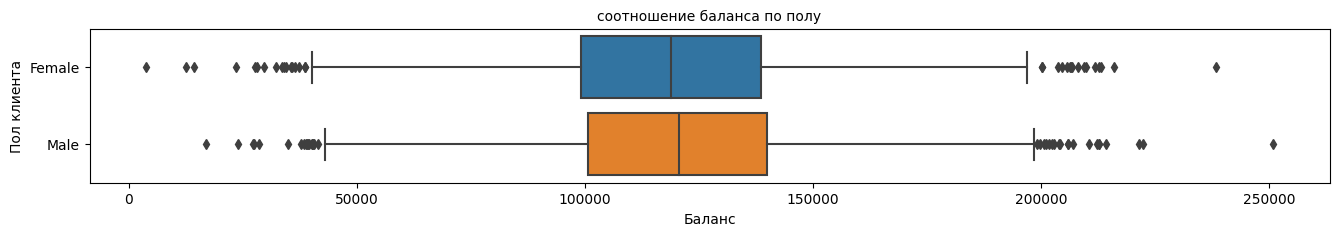

In [214]:
churn_new = churn_data[churn_data.Balance > 2500] # фильтруем баланс
fig = plt.figure(figsize=(16, 2))
boxplot = sns.boxplot(data=churn_new, x='Balance', y='Gender')
boxplot.set_title('соотношение баланса по полу', fontsize=10)
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Пол клиента')

fig = px.histogram(churn_new, x="Balance", histnorm='probability density')
fig.show()

Комментарий: 
Больше всего клиентов с балансом в диапозоне 122000-124000. По полу у мужчин есть небольшой  перевес в сторону увеличения.

Задание 9.3

In [215]:
d_f = churn_data.groupby(by=['Ex/Lo'], as_index=False).mean() # Смотрим среднее значение счёта у клиентов в разрезе оттока
fig = px.bar(
    data_frame=d_f,
    x="Ex/Lo", 
    y="Balance", 
    color='Age', 
    text = 'Balance', 
    orientation='v', 
    height=300,
    width=1000, 
    title='Среднее значение счёта у клиента'
)
fig.show()



C:\Users\Psa1kl\AppData\Local\Temp\ipykernel_16504\205156963.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Комментарий:
Чем младше клиент, тем меньше балланс, что в итоге приводит к оттоку. Сделать условие лучше для молодой аудитории 

Задание 9.4

Text(0, 0.5, 'Лояльный \\ Ушедший')

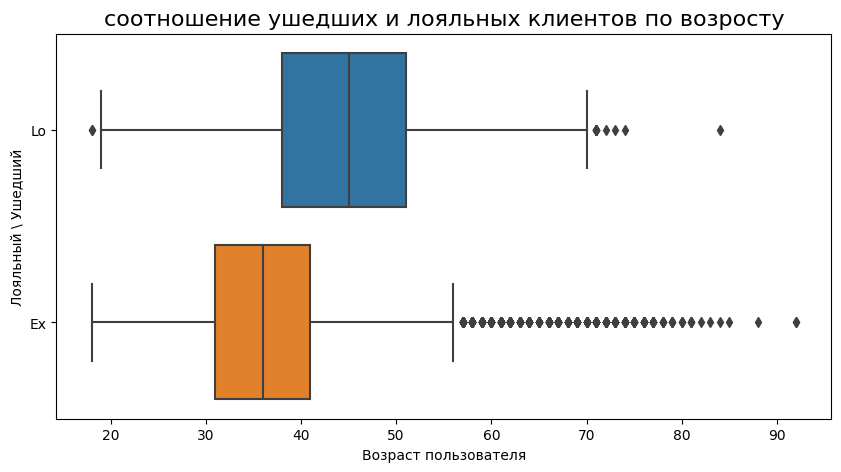

In [217]:

fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data=churn_data, x='Age', y='Ex/Lo')
boxplot.set_title('соотношение ушедших и лояльных клиентов по возросту', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Лояльный \ Ушедший')

Комментарий: 
Больше всего выбросов у ушедших клиентов в возрасте 55+

Задание 9.5

Text(0, 0.5, 'Кредитный рейтинг')

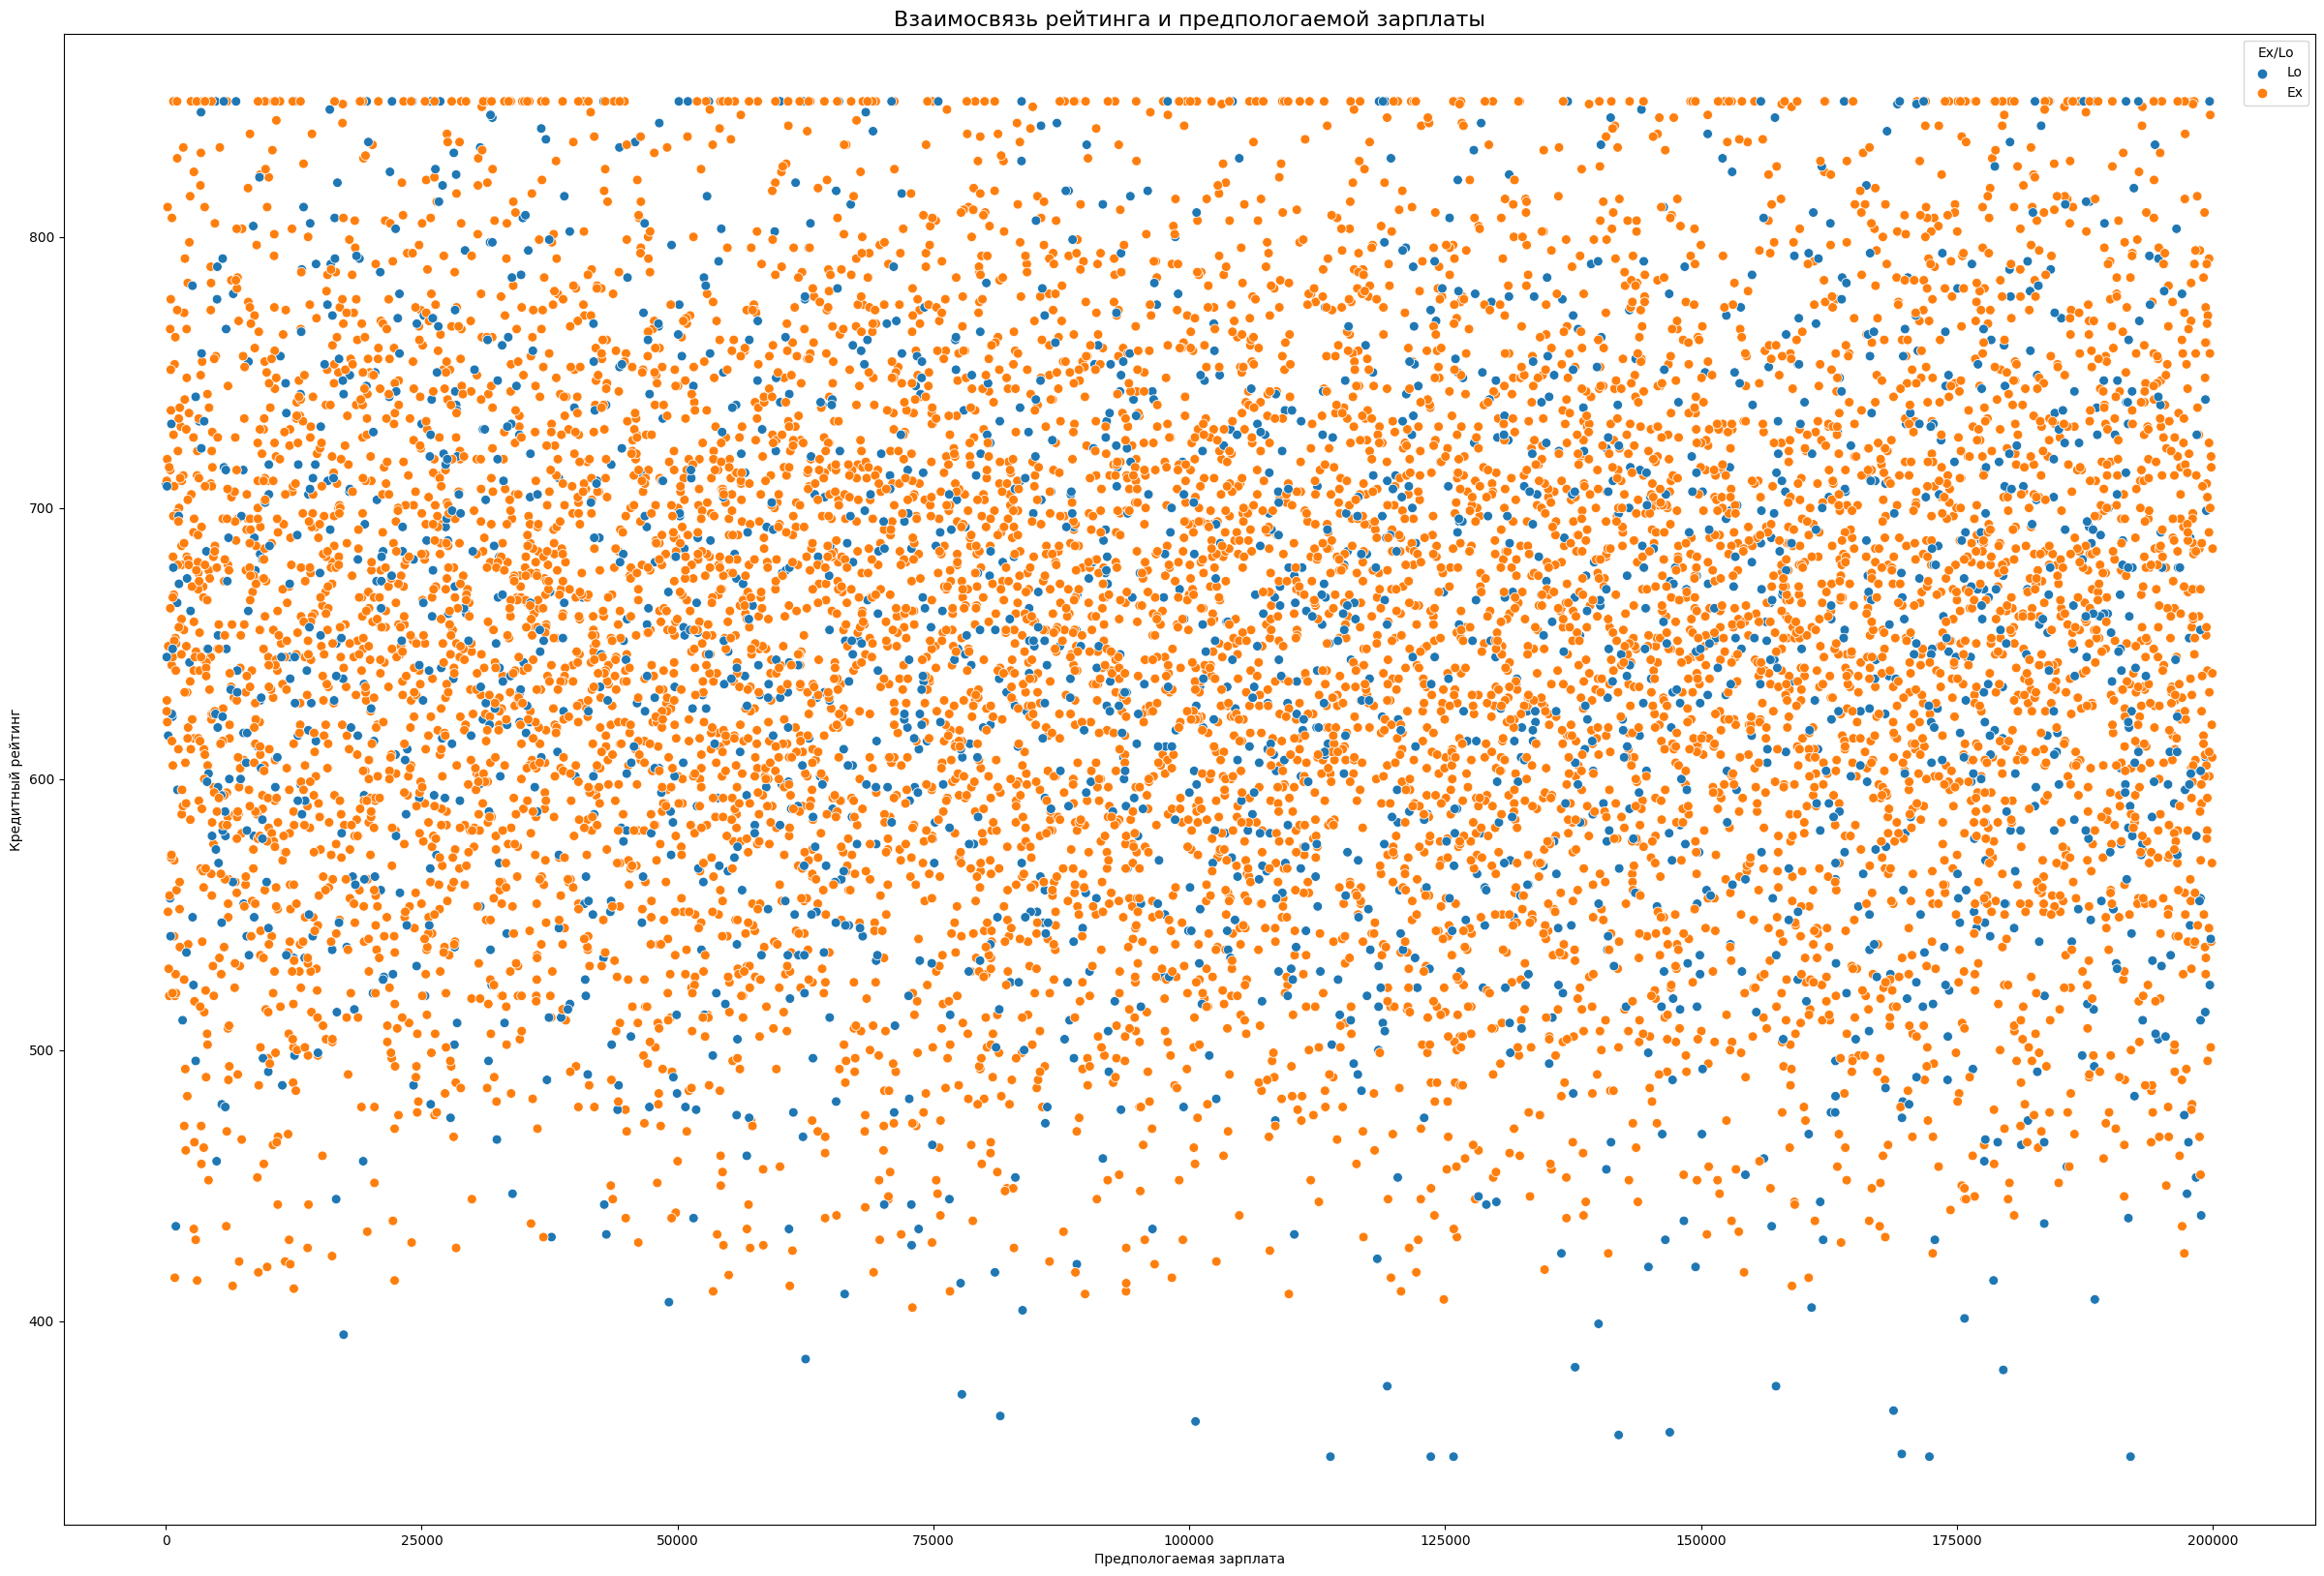

In [222]:
fig = plt.figure(figsize=(30, 20))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Ex/Lo',
    s=50
)
scatterplot.set_title('Взаимосвязь рейтинга и предпологаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Предпологаемая зарплата')
scatterplot.set_ylabel('Кредитный рейтинг')

Комментарий:
Явной взаимосвязи нет.

Задание 9.6

In [271]:
df_sex = churn_data.groupby(by=['Exited', 'Gender'], as_index=False).count() # подсчитаем лояльных и ушедших клиентов по полу
fig = px.bar(
    data_frame=df_sex,
    x="Gender", 
    y="Ex/Lo", 
    color='Exited', 
    text = 'Ex/Lo', 
    orientation='v', 
    height=600,
    width=1000, 
    title='Соотношение лояльных и ушедших клиентов по полу'
)
fig.show()


Комментарий:
Чаще уходят мужчины.

Задание 9.7

Text(0.5, 1.0, 'Отток клиентов  от числа приобретённых у банка услуг')

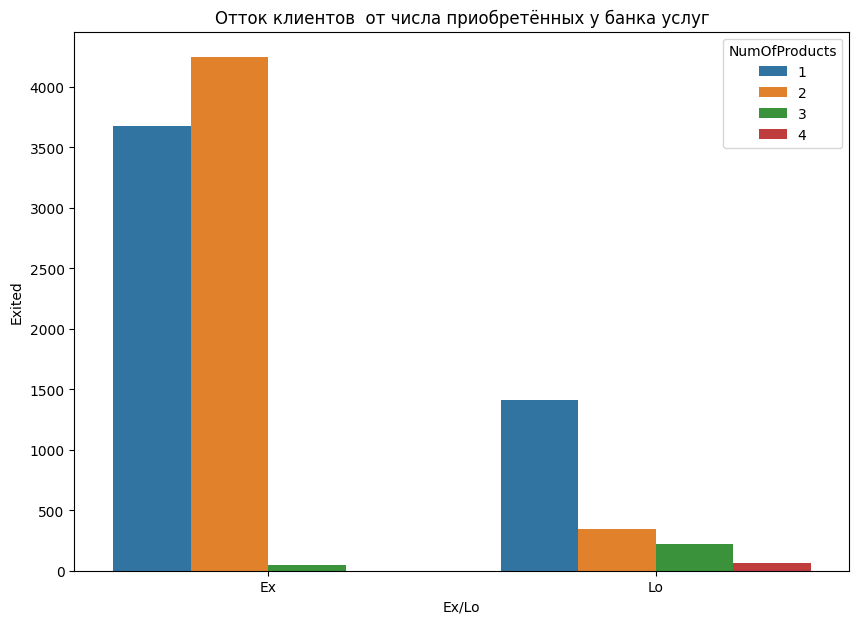

In [379]:
df_lo = churn_data.groupby(by=['Ex/Lo', 'NumOfProducts'], as_index=False).count()#соотношение по кол-ву продуктов

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=df_lo,
    x='Ex/Lo',
    y='Exited',
    hue='NumOfProducts',
)
barplot.set_title('Отток клиентов  от числа приобретённых у банка услуг')

Комментарий:
У ушедших клиентов не правильное распределение. У них было больше одного продукта, скорее всего навязывание дополнительных. У лояльных клиентов правельное распределение.

Задание 9.8

<AxesSubplot: xlabel='None-IsActiveMember', ylabel='Exited'>

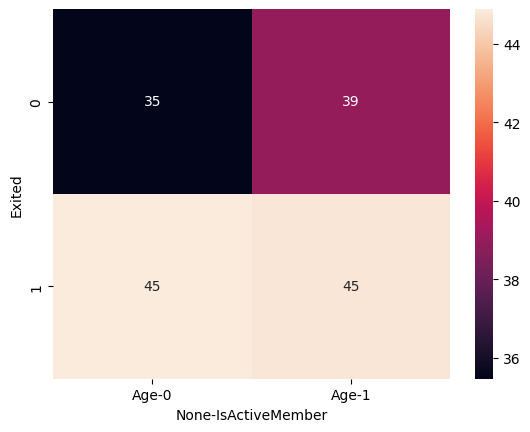

In [435]:
pivot1 = pd.pivot_table(churn_data,
                        index=['Exited'],
                        values=['Age'],
                        columns=['IsActiveMember']
                        )
sns.heatmap(pivot1, annot=True)


Комментарий:Наличие статуса активного клиента влияеет на отток клиентов по возрасту. Банку надо поработать с с более младшей неактивной аудиторией.

Задание 9.9

In [285]:

df_map = churn_data.groupby(by=['Exited', 'Geography'], as_index=False).count() #группируем по странам
fig = px.choropleth(
    data_frame=df_map, 
    locations="Geography", 
    locationmode = "country names",
    color="Ex/Lo", 
    range_color=[0, 5000], 
    title='Тепловая картограмма по соотношению лояльных и ушедших клиентов', 
    animation_frame="Exited", 
    width=800, 
    height=500, 
    color_continuous_scale='Oranges'
)
fig.show()

Комментарий: Соотношение Ушедших в Германии 1/2, в Испании и Франции 1/5. Возможно это связанно с размером страны по территории.

Задание 9.10

                  Exited                                                    \
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.15

<AxesSubplot: xlabel='None-Tenure', ylabel='CreditScoreCat'>

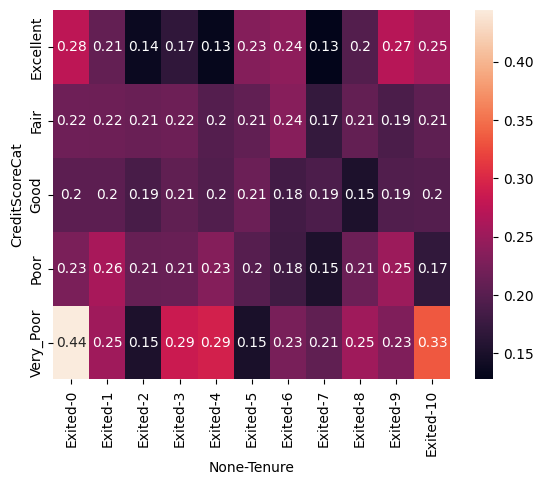

In [385]:
def get_credit_score_cat(credit_score): 
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) #применяем функцию к столбцу 
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype("category")
pivot = pd.pivot_table(churn_data,
               values=['Exited'],
               columns=['Tenure'],
               index=['CreditScoreCat']
) # строим сводную таблицу
print(pivot)
sns.heatmap(pivot, annot=True)

Комментарий:Категории клиентов, которые уходят чаще всего Excellent(3,5,8 лет), затем Very_Poor(3,6 лет), Poor 8 лет и Good 9 лет.